In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import os , shutil  
import cv2  
import matplotlib.image as mpimg 
%matplotlib inline 
plt.style.use('ggplot') 

# Data Preparation

In [3]:
import zipfile

z=zipfile.ZipFile(r'C:\Users\Aditya\Downloads\Brain Tumour zip file.zip')

z.extractall()

In [3]:
folder= 'brain_tumor_dataset/yes/'
count=1

for filename in os.listdir(folder):
    source= folder +filename
    destination= folder + 'Y_' +str(count) +'.jpg'
    os.rename(source , destination)
    count+=1 
print('All files are renamed in the yes dir')

All files are renamed in the yes dir


In [4]:
folder= 'brain_tumor_dataset/no/'
count=1

for filename in os.listdir(folder):
    source= folder +filename
    destination= folder + 'N_' +str(count) +'.jpg'
    os.rename(source , destination)
    count+=1 
print('All files are renamed in the No dir')

All files are renamed in the No dir


# EDA (Exploratory Data Analysis)

In [5]:
number_files_no=len(os.listdir('brain_tumor_dataset/no/'))
print(number_files_no)

number_files_yes=len(os.listdir('brain_tumor_dataset/yes/'))
print(number_files_yes)

98
155


In [6]:
#plot

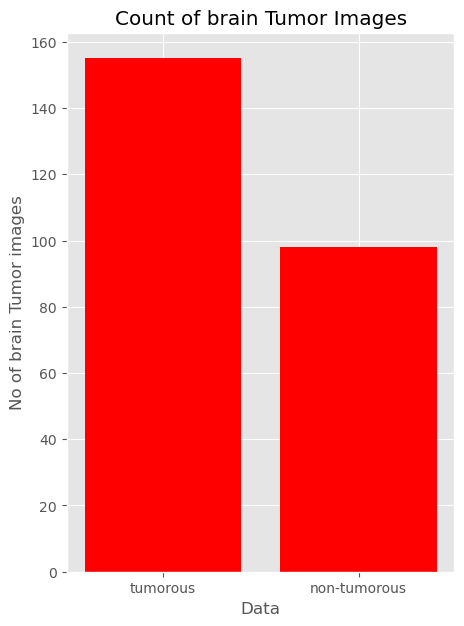

In [7]:
data={'tumorous':number_files_yes , 'non-tumorous':number_files_no}

type=data.keys() 
values=data.values() 

fig=plt.figure(figsize=(5,7))

plt.bar(type , values , color='red')
plt.xlabel('Data')
plt.ylabel('No of brain Tumor images')
plt.title('Count of brain Tumor Images')
plt.show()


As the Data is so small for DEEP LEARNING , we have to expand it (add kore images into the data)

# DATA augmentation

155(61%), 98(39%)


Imbalance

In [12]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Flatten , Dense , Dropout 
from tensorflow.keras.optimizers import Adam , SGD 
from tensorflow.keras.applications.vgg19 import VGG19 
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint , ReduceLROnPlateau 

In [9]:
#"brain_tumor_dataset/yes/Y_1.jpg' 
#where Y_1.jpg is filename


In [27]:
def timing(sec_elapsed): 
    h= int(sec_elapsed / (60*60))
    m= int(sec_elapsed % (60*60)/60)
    s= sec_elapsed % 60 
    return f'{h}:{m}:{s}'

In [20]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [28]:
import time
start_time = time.time()

yes_path = 'brain_tumor_dataset/yes' 
no_path = 'brain_tumor_dataset/no'

augmented_data_path = 'brain_tumor_dataset/augmented_data/'

augmented_data(file_dir = yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir = no_path, n_generated_samples=9, save_to_dir=augmented_data_path+'no')

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))

0:3:49.22320747375488


In [31]:
def data_summary(main_path): 
    yes_path = 'brain_tumor_dataset/augmented_data/yes/'
    no_path = 'brain_tumor_dataset/augmented_data/no/'

    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path)) 

    n= (n_pos + n_neg) 

    pos_percentage = (n_pos*100) / n 
    neg_percentage = (n_neg*100) / n  

    print(f'no of samples{n}') 
    print(f'{n_pos} Number of positive sample in percentage: {pos_percentage}')
    print(f'{n_neg} Number of positive sample in percentage: {neg_percentage}')


In [32]:
data_summary(augmented_data_path)

no of samples2063
1085 Number of positive sample in percentage: 52.59331071255453
978 Number of positive sample in percentage: 47.40668928744547


In [33]:
number_files_no=len(os.listdir('brain_tumor_dataset/augmented_data/no/'))
print(number_files_no)

number_files_yes=len(os.listdir('brain_tumor_dataset/augmented_data/yes/'))
print(number_files_yes)

978
1085


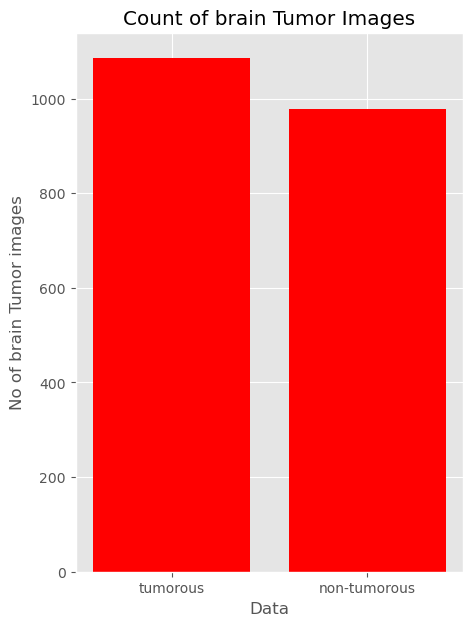

In [34]:
data={'tumorous':number_files_yes , 'non-tumorous':number_files_no}

type=data.keys() 
values=data.values() 

fig=plt.figure(figsize=(5,7))

plt.bar(type , values , color='red')
plt.xlabel('Data')
plt.ylabel('No of brain Tumor images')
plt.title('Count of brain Tumor Images')
plt.show()


# Data Preprocessing

In [35]:
# Convert BGR TO GRAY
# GaussianBlur
# Threshold
# Erode
# Dilate
# Find Contours

In [37]:
pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=67a1899dddc293baf8b0d69f6ee7c663181b33553b6aa277044bcb9ed7f09175
  Stored in directory: c:\users\aditya\appdata\local\pip\cache\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import imutils

In [16]:
import imutils
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)
    
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image
    

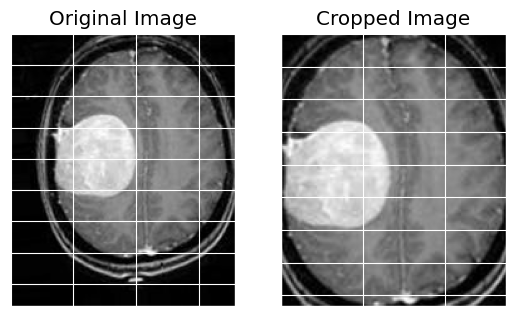

array([[[2, 2, 2],
        [2, 2, 2],
        [3, 3, 3],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]]], dtype=uint8)

In [59]:
img= cv2.imread('C:/Users/Aditya/brain_tumor_dataset/augmented_data/yes/aug_Y_1_0_2228.jpg')
crop_brain_tumor(img ,True)

## Loading Image

In [6]:
import os

In [7]:
from sklearn.utils import shuffle 

In [19]:
folder1='C:/Users/Aditya/brain_tumor_dataset/augmented_data/no/'
folder2='C:/Users/Aditya/brain_tumor_dataset/augmented_data/yes/'

for filename in os.listdir(folder1):
    img=cv2.imread(folder1 + filename)
    img=crop_brain_tumor(img , False )
    cv2.imwrite(folder1 + filename, img) 
for filename in os.listdir(folder2):
    img=cv2.imread(folder2 + filename)
    img=crop_brain_tumor(img , False )
    cv2.imwrite(folder2 + filename, img) 

In [20]:
def load_data(dir_list , image_size): 
    x=[] 
    y=[] 

    image_width , image_height = image_size 

    for directory in dir_list:
        for filename in os.listdir(directory): 
            image= cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image , plot=False) 
            image= cv2.resize(image , dsize=(image_width , image_height) , interpolation= cv2.INTER_CUBIC)
            image= image/255.00
            x.append(image)
            if directory[-3:] =='yes': 
                y.append(1)
            else: 
                y.append(0) 

    x=np.array(x)
    y=np.array(y)

    x,y = shuffle(x,y) 
    print(f'Number of example is : {len(x)}')
    print(f'x shape is : {x.shape}')
    print(f'y shape is : {y.shape}') 
    return x,y 
    

In [21]:
augmented_path= 'brain_tumor_dataset/augmented_data/'
augmented_yes = augmented_path + 'yes'
augmented_no = augmented_path + 'no'

IMAGE_WIDTH , IMAGE_HEIGHT = (240 , 240)

x,y = load_data ([augmented_yes , augmented_no] , (IMAGE_WIDTH , IMAGE_HEIGHT))



Number of example is : 2063
x shape is : (2063, 240, 240, 3)
y shape is : (2063,)


## Data Spliting 

In [14]:
#train 

#test 

#validation

In [22]:
import os

In [23]:
if not os.path.isdir('tumorous_and_nontumorous'):
    base_dir='tumorous_and_nontumorous'
    os.mkdir(base_dir)

In [24]:
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir=os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir=os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir=os.path.join(base_dir ,'valid')
    os.mkdir(valid_dir)

In [25]:
if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir , 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir , 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join(valid_dir , 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [26]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir , 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir , 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir , 'tumorous')
    os.mkdir(infected_valid_dir)

In [27]:
import os

In [28]:
original_dataset_tumorous= os.path.join('brain_tumor_dataset/augmented_data' , 'yes/')
original_dataset_nontumorous= os.path.join('brain_tumor_dataset/augmented_data' , 'no/')

In [29]:
files= os.listdir('brain_tumor_dataset/augmented_data/yes/')
fnames=[] 
for i in range(0,759):
    fnames.append(files[i])
for fname in fnames: 
    src = os.path.join(original_dataset_tumorous , fname) 
    dst= os.path.join('tumorous_and_nontumorous/train/tumorous' , fname)
    shutil.copyfile(src , dst)



In [30]:
files= os.listdir('brain_tumor_dataset/augmented_data/yes/')
fnames=[] 
for i in range(759,922):
    fnames.append(files[i])
for fname in fnames: 
    src = os.path.join(original_dataset_tumorous , fname) 
    dst= os.path.join('tumorous_and_nontumorous/test/tumorous' , fname)
    shutil.copyfile(src , dst)



In [31]:
files= os.listdir('brain_tumor_dataset/augmented_data/yes/')
fnames=[] 
for i in range(922,1085):
    fnames.append(files[i])
for fname in fnames: 
    src = os.path.join(original_dataset_tumorous , fname) 
    dst= os.path.join('tumorous_and_nontumorous/valid/tumorous' , fname)
    shutil.copyfile(src , dst)



In [32]:
files= os.listdir('brain_tumor_dataset/augmented_data/no/')
fnames=[] 
for i in range(0,686):
    fnames.append(files[i])
for fname in fnames: 
    src = os.path.join(original_dataset_nontumorous , fname) 
    dst= os.path.join('tumorous_and_nontumorous/train/nontumorous' , fname)
    shutil.copyfile(src , dst)



In [33]:
files= os.listdir('brain_tumor_dataset/augmented_data/no/')
fnames=[] 
for i in range(686, 833):
    fnames.append(files[i])
for fname in fnames: 
    src = os.path.join(original_dataset_nontumorous , fname) 
    dst= os.path.join('tumorous_and_nontumorous/test/nontumorous' , fname)
    shutil.copyfile(src , dst)

In [34]:
files= os.listdir('brain_tumor_dataset/augmented_data/no/')
fnames=[] 
for i in range(833,978):
    fnames.append(files[i])
for fname in fnames: 
    src = os.path.join(original_dataset_nontumorous , fname) 
    dst= os.path.join('tumorous_and_nontumorous/valid/nontumorous' , fname)
    shutil.copyfile(src , dst)

In [7]:
train_data_gen= ImageDataGenerator(rescale=1./255,horizontal_flip=0.4 , vertical_flip=0.4 , rotation_range=40 , shear_range=0.2 , width_shift_range= 0.4 , height_shift_range= 0.4 , fill_mode='nearest')
test_data_gen= ImageDataGenerator(rescale=1.0/255) 
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

In [8]:
train_generator=train_data_gen.flow_from_directory('tumorous_and_nontumorous/train/' , batch_size=32 , target_size=(240,240), class_mode='categorical', shuffle=True, seed=42, color_mode='rgb')

Found 1445 images belonging to 2 classes.


In [9]:
test_generator=test_data_gen.flow_from_directory('tumorous_and_nontumorous/test/' , batch_size=32 , target_size=(240,240), class_mode='categorical', shuffle=True, seed=42, color_mode='rgb')

Found 310 images belonging to 2 classes.


In [10]:
valid_generator=valid_data_gen.flow_from_directory('tumorous_and_nontumorous/valid/' , batch_size=32 , target_size=(240,240), class_mode='categorical', shuffle=True, seed=42, color_mode='rgb')

Found 308 images belonging to 2 classes.


In [39]:
class_labels = train_generator.class_indices 
class_name = {value:key for (key , value) in class_labels.items()}

In [40]:
class_name

{0: 'nontumorous', 1: 'tumorous'}

In [41]:
base_model= VGG19(input_shape=(240,240,3) , include_top= False , weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False

x= base_model.output 
flat= Flatten()(x)

class_1=Dense(4608 , activation='relu')(flat)
drop_out= Dropout(0,2)(class_1)
class_2= Dense(1152 , activation='relu')(drop_out)
output= Dense(2 , activation='softmax')(class_2)

model_01= Model(base_model.input , output)
model_01.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [12]:
filepath='model_01.keras' 
es=EarlyStopping(monitor='val_loss' , verbose=1 , mode='min' , patience=4)
cp=ModelCheckpoint(filepath , monitor='val_loss', verbose=1 , save_best_only=True , save_weights_only=False, mode='auto', save_freq='epoch')
lrr=ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1 , factor=0.5 , min_lr=0.0001)

In [43]:
sgd= SGD(learning_rate=0.0001 , decay= 1e-6 , momentum=0.9 , nesterov=True)
model_01.compile(loss='categorical_crossentropy' , optimizer=sgd , metrics=['accuracy'])

C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [47]:
compile_01=model_01.fit(train_generator, steps_per_epoch=10 , epochs=3, callbacks=[es, cp , lrr], validation_data=valid_generator)

Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.6606 - loss: 0.6166 
Epoch 1: val_loss improved from 0.62560 to 0.61963, saving model to model_01.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 351s 36s/step - accuracy: 0.6600 - loss: 0.6177 - val_accuracy: 0.6623 - val_loss: 0.6196 - learning_rate: 1.0000e-04
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6134 - loss: 0.6573 
Epoch 2: val_loss improved from 0.61963 to 0.61203, saving model to model_01.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 333s 35s/step - accuracy: 0.6167 - loss: 0.6546 - val_accuracy: 0.6753 - val_loss: 0.6120 - learning_rate: 1.0000e-04
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14s/step - accuracy: 0.6797 - loss: 0.6157 
Epoch 3: val_loss did not improve from 0.61203
10/10 ━━━━━━━━━━━━━━━━━━━━ 297s 31s/step - accuracy: 0.6809 - loss: 0.6148 - val_accuracy: 0.6396 - val_loss: 0.6129 - learning_rate: 1.0000e-04


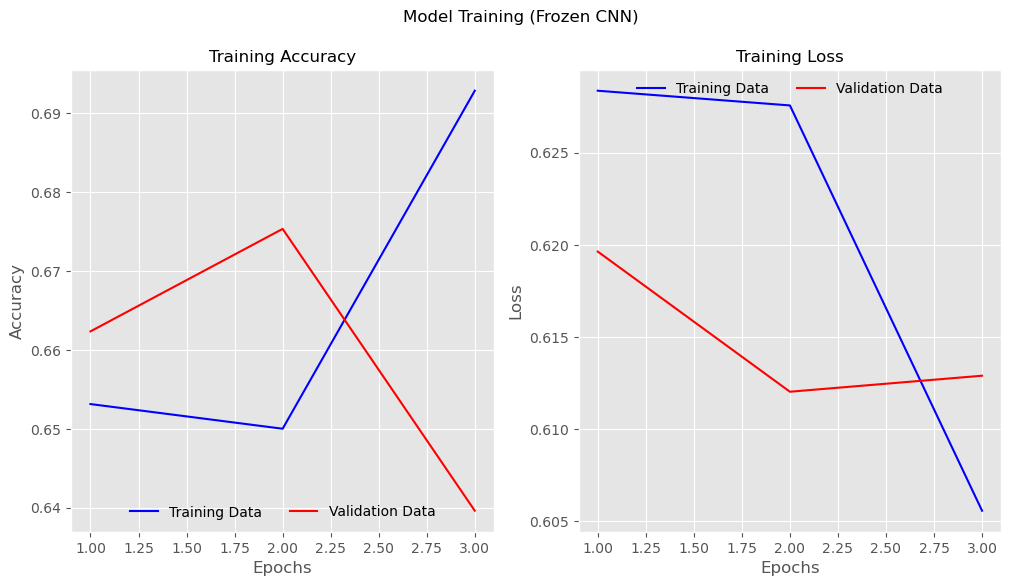

In [48]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(compile_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, compile_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, compile_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, compile_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, compile_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [55]:
if not os.path.isdir('C:/Users/Aditya/model_weights/'):
    os.mkdir('C:/Users/Aditya/model_weights/')
model_01.save_weights(filepath='C:/Users/Aditya/model_weights/vgg19_model_01.weights.h5', overwrite=True)

In [57]:
model_01.load_weights('C:/Users/Aditya/model_weights/vgg19_model_01.weights.h5')
vgg_val_eval_01=model_01.evaluate(valid_generator)
vgg_test_eval_01=model_01.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 14s/step - accuracy: 0.6019 - loss: 0.6323


C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 139s 14s/step - accuracy: 0.5835 - loss: 0.7241


In [58]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Acc: {vgg_val_eval_01[1]}')
print(f'Testing Loss: {vgg_test_eval_01[0]}')
print(f'Testinlhg Acc: {vgg_test_eval_01[1]}')

Validation Loss: 0.6129021048545837
Validation Acc: 0.6396104097366333
Testing Loss: 0.7130914926528931
Testinlhg Acc: 0.57419353723526


In [59]:
filenames = test_generator.filenames
nb_sample = len(filenames)

vgg_prediction_01 = model_01.predict(test_generator, steps=nb_sample, verbose = 1)
y_pred = np.argmax(vgg_prediction_01, axis=1)

  1/310 ━━━━━━━━━━━━━━━━━━━━ 1:20:37 16s/step

KeyboardInterrupt: 

In [64]:
# Increamental unfreezing and fine tuning

In [60]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

['input_layer_2',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [61]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights('C:/Users/Aditya/model_weights/vgg19_model_01.weights.h5')

set_trainable=False
for layer in base_model.layers:
    if layer.name in ['block5_conv4','block5_conv3']:
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

print(model_02.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

None


In [62]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [63]:
compile_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs = 2, callbacks=[es,cp,lrr], validation_data=valid_generator)


Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.6429 - loss: 0.6428 
Epoch 1: val_loss improved from 0.61203 to 0.60416, saving model to model_01.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 390s 40s/step - accuracy: 0.6422 - loss: 0.6428 - val_accuracy: 0.6721 - val_loss: 0.6042 - learning_rate: 1.0000e-04
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.5960 - loss: 0.6468 
Epoch 2: val_loss did not improve from 0.60416
10/10 ━━━━━━━━━━━━━━━━━━━━ 301s 31s/step - accuracy: 0.5958 - loss: 0.6473 - val_accuracy: 0.6851 - val_loss: 0.6060 - learning_rate: 1.0000e-04


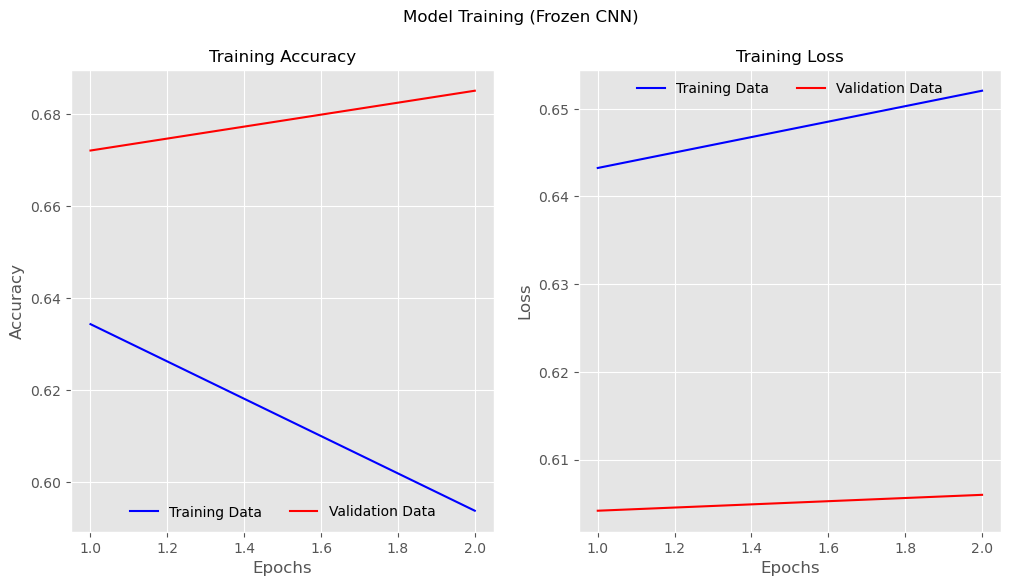

In [65]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(compile_02.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, compile_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, compile_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, compile_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, compile_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [69]:
if not os.path.isdir('C:/Users/Aditya/model_weights/'):
    os.mkdir('C:/Users/Aditya/model_weights/')
model_02.save_weights(filepath='C:/Users/Aditya/model_weights/vgg19_model_02.weights.h5', overwrite=True)

In [70]:
model_02.load_weights('C:/Users/Aditya/model_weights/vgg19_model_02.weights.h5')
vgg_val_eval_02=model_02.evaluate(valid_generator)
vgg_test_eval_02=model_02.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 137s 14s/step - accuracy: 0.6422 - loss: 0.6435
10/10 ━━━━━━━━━━━━━━━━━━━━ 137s 13s/step - accuracy: 0.5671 - loss: 0.7264


In [71]:
print(f'Validation Loss: {vgg_val_eval_02[0]}')
print(f'Validation Acc: {vgg_val_eval_02[1]}')
print(f'Testing Loss: {vgg_test_eval_02[0]}')
print(f'Testinlhg Acc: {vgg_test_eval_02[1]}')

Validation Loss: 0.6059757471084595
Validation Acc: 0.6850649118423462
Testing Loss: 0.6995116472244263
Testinlhg Acc: 0.603225827217102


## unfreezing the entie network

In [13]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights('C:/Users/Aditya/model_weights/vgg19_model_02.weights.h5')

sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_03.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [15]:
model_03.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
compile_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs = 3, callbacks=[es,cp,lrr], validation_data=valid_generator)


Epoch 1/3


C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 89s/step - accuracy: 0.6532 - loss: 0.6378  
Epoch 1: val_loss improved from inf to 0.62598, saving model to model_01.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1120s 113s/step - accuracy: 0.6529 - loss: 0.6378 - val_accuracy: 0.6981 - val_loss: 0.6260 - learning_rate: 1.0000e-04
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 78s/step - accuracy: 0.6574 - loss: 0.6264  
Epoch 2: val_loss improved from 0.62598 to 0.61166, saving model to model_01.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 990s 99s/step - accuracy: 0.6557 - loss: 0.6301 - val_accuracy: 0.7078 - val_loss: 0.6117 - learning_rate: 1.0000e-04
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2897s/step - accuracy: 0.7340 - loss: 0.5810   
Epoch 3: val_loss improved from 0.61166 to 0.58659, saving model to model_01.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 26359s 2918s/step - accuracy: 0.7312 - loss: 0.5825 - val_accuracy: 0.7078 - val_loss: 0.5866 - learning_rate: 1.0000e-04


In [15]:
import os

In [20]:
if not os.path.isdir('C:/Users/Aditya/model_weights/'):
    os.mkdir('C:/Users/Aditya/model_weights/')
model_03.save_weights(filepath='C:/Users/Aditya/model_weights/vgg_unfrozen.weights.h5', overwrite=True)

In [21]:
model_03.load_weights('C:/Users/Aditya/model_weights/vgg_unfrozen.weights.h5')
vgg_val_eval_03=model_03.evaluate(valid_generator)
vgg_test_eval_03=model_03.evaluate(test_generator) 

10/10 ━━━━━━━━━━━━━━━━━━━━ 130s 13s/step - accuracy: 0.7162 - loss: 0.5796
10/10 ━━━━━━━━━━━━━━━━━━━━ 152s 15s/step - accuracy: 0.6321 - loss: 0.6820


In [23]:
base_model = VGG19(include_top=False, input_shape=(240,240,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.3)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_04 = Model(base_model.inputs, output)
model_04.load_weights('C:/Users/Aditya/model_weights/vgg_unfrozen.weights.h5')

sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_04.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

C:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [24]:
model_04.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
compile_04 = model_04.fit(train_generator, steps_per_epoch=10, epochs = 3, callbacks=[es,cp,lrr], validation_data=valid_generator)


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 83s/step - accuracy: 0.7200 - loss: 0.5995  
Epoch 1: val_loss improved from 0.58659 to 0.58299, saving model to model_01.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 1028s 102s/step - accuracy: 0.7196 - loss: 0.5990 - val_accuracy: 0.7110 - val_loss: 0.5830 - learning_rate: 1.0000e-04
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 81s/step - accuracy: 0.7207 - loss: 0.5815  
Epoch 2: val_loss improved from 0.58299 to 0.57747, saving model to model_01.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 991s 101s/step - accuracy: 0.7197 - loss: 0.5825 - val_accuracy: 0.7208 - val_loss: 0.5775 - learning_rate: 1.0000e-04
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 82s/step - accuracy: 0.7061 - loss: 0.5736  
Epoch 3: val_loss improved from 0.57747 to 0.56349, saving model to model_01.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 995s 101s/step - accuracy: 0.7059 - loss: 0.5750 - val_accuracy: 0.7532 - val_loss: 0.5635 - learning_rate: 1.0000e-04


In [26]:
if not os.path.isdir('C:/Users/Aditya/model_weights/'):
    os.mkdir('C:/Users/Aditya/model_weights/')
model_04.save_weights(filepath='C:/Users/Aditya/model_weights/vgg_unfrozen1.weights.h5', overwrite=True)

In [27]:
model_04.load_weights('C:/Users/Aditya/model_weights/vgg_unfrozen1.weights.h5')
vgg_val_eval_04=model_04.evaluate(valid_generator)
vgg_test_eval_04=model_04.evaluate(test_generator) 

10/10 ━━━━━━━━━━━━━━━━━━━━ 131s 13s/step - accuracy: 0.7662 - loss: 0.5521
10/10 ━━━━━━━━━━━━━━━━━━━━ 139s 13s/step - accuracy: 0.6037 - loss: 0.6627


In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def get_grad_cam_heatmap(model, img_array, layer_name, class_index):
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    # Record operations for backpropagation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    # Calculate the gradient of the loss with respect to the feature maps
    grads = tape.gradient(loss, conv_outputs)

    # Compute the channel-wise mean of the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each feature map by its weight and sum them up
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap.numpy()

def display_grad_cam(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale the heatmap to [0, 255]
    heatmap = np.uint8(255 * heatmap)

    # Resize the heatmap to match the image size
    heatmap = tf.keras.preprocessing.image.array_to_img(heatmap)
    heatmap = heatmap.resize((img.shape[1], img.shape[0]))
    heatmap = np.array(heatmap)

    # Overlay the heatmap on the original image
    overlay = np.uint8(img * (1 - alpha) + heatmap[:, :, np.newaxis] * alpha)

    # Display the image with heatmap
    plt.imshow(overlay)
    plt.axis('off')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Path to the image
    img_path = r"C:\Users\Aditya\tumorous_and_nontumorous\test\tumorous\aug_Y_5_0_7311.jpg"

    # Load and preprocess the image
    img_size = (224, 224)  # Adjust based on your model
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Load the model
    model = tf.keras.models.load_model(r"C:\Users\Aditya\model_weights\vgg_unfrozen.weights.h5")

    # Specify the target layer and class index
    target_layer = "block5_conv4"  # Replace with your model's last conv layer
    class_index = np.argmax(model.predict(img_array))

    # Generate Grad-CAM heatmap
    heatmap = get_grad_cam_heatmap(model, img_array, target_layer, class_index)

    # Display Grad-CAM overlay
    display_grad_cam(img_path, heatmap)


ValueError: No model config found in the file at C:\Users\Aditya\model_weights\vgg_unfrozen1.weights.h5.